In [1]:
# IMPORT STATEMENTS

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# STORING THE CSV DATA SET AND READING IT

df1 = pd.read_csv("datasets_20710_26737_Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# DISPLAYS NUMBER OF ROWS AND COLUMNS RESPECTIVELY

df1.shape

(13320, 9)

In [4]:
# GETS THE AREA_TYPE COLUMN AND AGGREGATES THEIR TOTALS

df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# DROPPING (REMOVING) NOT REQUIRED COLUMNS

df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# TELLS YOU THE NUMBER OF ROWS IN A COLUMN WHERE THE VALUE IS N/A (NULL)

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# REMOVE N/A VALUES AND THEN DISPLAY THE NUMBER OF N/A VALUES IN NEW DROPPED DATA SET

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
# DISPLAYS ALL UNIQUE VALUES

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# CREATING NEW COLUMN, BASED ON THE SIZE COLUMN AND .. FUNCTION IS APPLIED TO IT

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
# DISPLAY ALL COLUMNS WITH BHK VALUE GREATER THAN 20

df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# CHECK UNIQUE VALUES OF THE TOTAL_SQFT COLUMN

df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# DEFINING AN 'ISFLOAT' FUNCTION TO CHECK IF A VALUE IS A FLOAT OR NOT WHEN TRYING TO CONVERT IT TO A FLOAT

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
# APPLY 'ISFLOAT' FUNCTION TO THE COLUMN TOTAL_SQFT
# NOTE: ~ is a negate operation

df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
# FOR TOTAL_SQFT COLUMN NEED TO GET AVERAGE FOR RANGE VALUES AND REMOVE THE VALUES WITH ADDITIONAL STRINGS E.G. SQMETER, PERCH

In [18]:
# FUNCTION TO CONVERT SQFT RANGE VALUE INTO A SINGLE NUMBER

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
# TESTING FUNCTION

convert_sqft_to_num('2166')

2166.0

In [20]:
convert_sqft_to_num('2000 - 2500')

2250.0

In [21]:
convert_sqft_to_num('34.46Sq. Meter')

In [22]:
# CREATE NEW DATAFRAME AND MAKE TOTAL_SQFT COLUMN HAVE FLOATS ONLY

df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [23]:
# ACCESS DF4 30TH INDEX

df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
# NEW DATAFRAME AND MAKING NEW COLUM FOR FREATURE ENGINEERING AND OUTLIER REMOVAL

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
# CHECKING TOTAL NUMBER OF UNIQUE 'LOCATION'

df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df5.location.unique())

1304

In [29]:
# REMOVE ANY EXTRA SPACES FROM 'LOCATION'

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [30]:
# DISPLAY NUMBER OF LOCATIONS WITH 10 OR LESS DATA POINTS

len(location_stats[location_stats<=10])

1052

In [31]:
# DISPLAY LOCATION NAMES WITH 10 OR LESS DATA POINTS

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [32]:
len(df5.location.unique())

1293

In [33]:
# CHANGE ALL THOSE LOCATION WITH 10 OR LESS DATA POINTS TO 'OTHER'


df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [34]:
# CHECKING NUMBER OF UNIQUE LOCATION NAMES 

len(df5.location.unique())

242

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [36]:
# OUTLIER REMOVAL (FOURTH VIDEO)

In [37]:
# 300SQFT PER BEDROOM IS WHAT YOUR MANAGER TELLS YOU IS CRITERIA
# THIS CHECKS IF THE 

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [39]:
df5.shape

(13246, 7)

In [40]:
# STORE ROWS THAT CONFORM IN NEW DATAFRAME

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [41]:
# USING DESRCIBE METHOD TO GET STATISTICS FOR THAT SPECIFIC COLUMN

df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
# FUNCTION WHICH REMOVES EXTREME CASES USING STD

def remove_pps_outliers(df):
    # ENSURING THAT IT CONTAINS A DATAFRAME
    df_out = pd.DataFrame()
    # FOR LOOP GOING THROUGH THE DF (GROUPED BY LOCATION COLUMN)
    for key, subdf in df.groupby('location'):
        # CALCULATING MEAN
        m = np.mean(subdf.price_per_sqft)
        # CALCULATING STD
        st = np.std(subdf.price_per_sqft)
        # FILTERING THE OUTLIERS 
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        # APPENDING THE OUTPUT DF UNTIL THE FINAL DF IS FILTERED
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

# CALLING THE FUNCTION ON DF6 AND STORING IN NEW DF7
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [43]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [44]:
# FUNCTION WHICH MAKES SCATTER PLOT TO DISPLAY LOW ROOMS WITH HIGH PRICES COMPARED TO HIGHER NUMBER OF ROOMS WITH HIGHER PRICES

def plot_scatter_chart(df,location):
    # DATAFRAME CONTAINING 2 BEDROOMS IN SAME LOCATION
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    # DATAFRAME CONTAINING 3 BEDROOMS IN SAME LOCATION
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    # FIGURE SIZE
    matplotlib.rcParams['figure.figsize'] = (15,10)
    # DRAW SCATTER FOR 2 BEDROOM
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    # DRAW SCATTER FOR 3 BEDROOM
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color='green', label='3 BHK', s=50)
    # LABELS FOR SCATTER PLOTS
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    # TITLE FOR SCATTER PLOTS
    plt.title(location)
    # LEGEND FPR SCATTER PLOTS
    plt.legend()



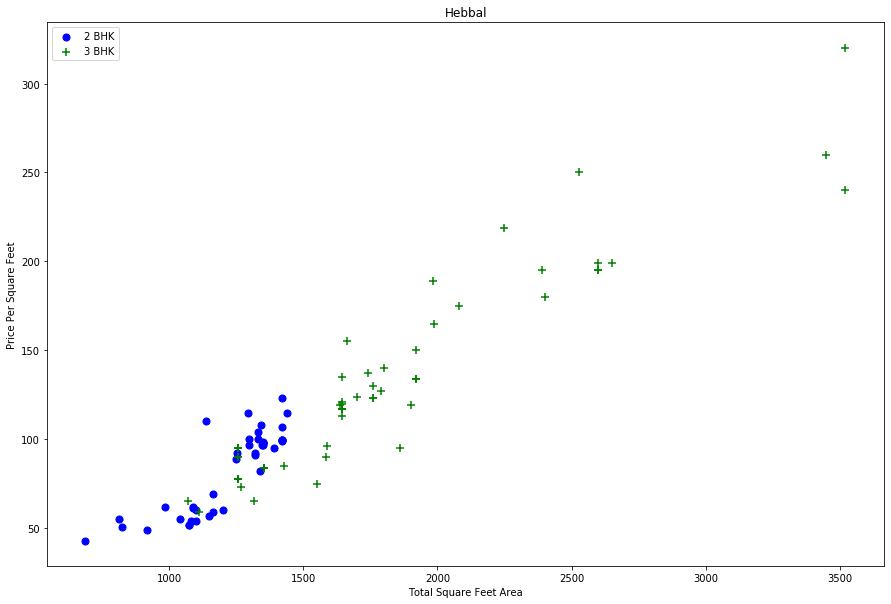

In [45]:
# RUNNING THE FUNCTION ON DF7 AND A LOCATION

plot_scatter_chart(df7, "Hebbal")

In [46]:
# FUNCTION TO REMOVE THE LOWER BEDROOM HOUSES WHICH ARE MORE EXPENSIVE THAN HIGHER BEDROOM HOUSES

def remove_bhk_outliers(df):
    # EMPTY ARRAY
    exclude_indices = np.array([])
    # FOR LOOP THROUGH THE GROUPED BY LOCATION 
    for location, location_df in df.groupby('location'):
        # STORE INDEXING VALUE
        bhk_stats = {}
        # FOR LOOP THROUGH THE GROUPED BY BHK
        for bhk, bhk_df in location_df.groupby('bhk'):
            # COMPUTING THESE VALUES PER BHK
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # ONCE PREV. FOR LOOP DONE, IT IS SAME LOOP TO EXCLUDE THOSE DATA POINTS         
        for bk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    
    
# CREATE NEW DATAFRAME TO RUN FUNCTION ON AND BE STORED IN
df8 = remove_bhk_outliers(df7)
df8.shape

(7464, 7)

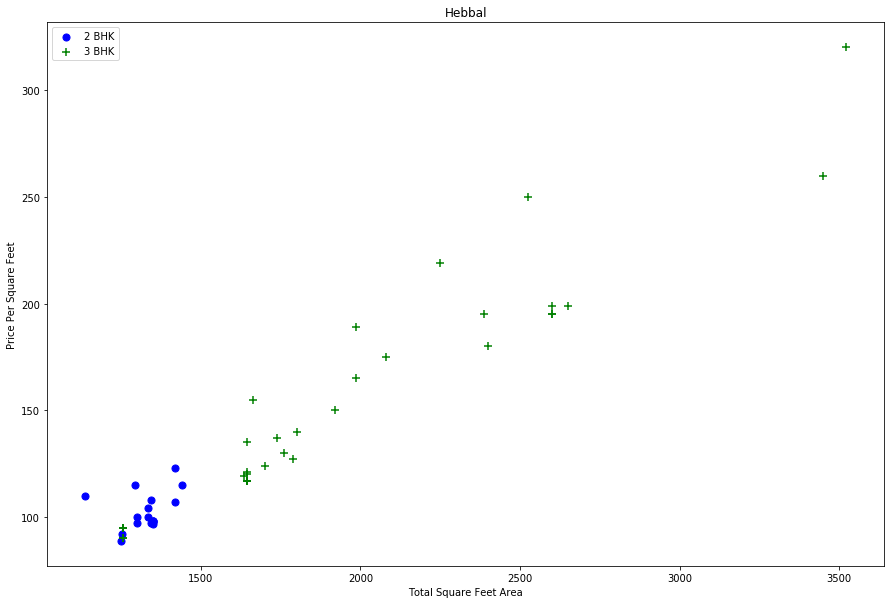

In [47]:
# RUN THE SAME SCATTER PLOT TO SEE IF THE OUTLIERS HAVE BEEN REMOVED

plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

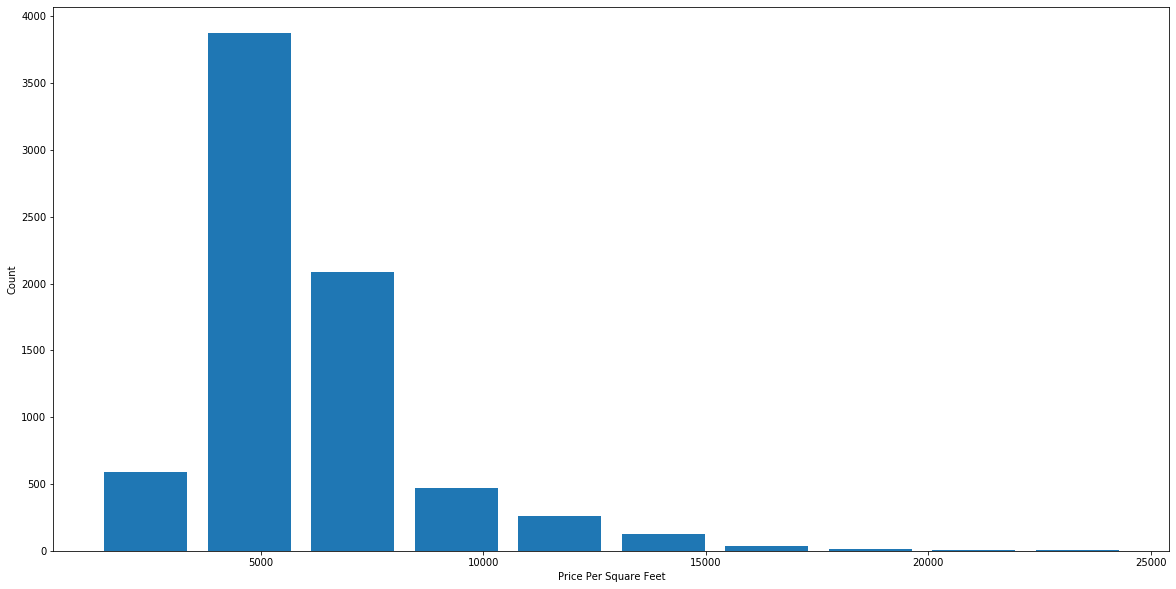

In [48]:
# HISTOGRAM FOR PRICE PER SQUARE FEET VS COUNT

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
# CHECK UNIQUE VALUES FOR BATHROOMS

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

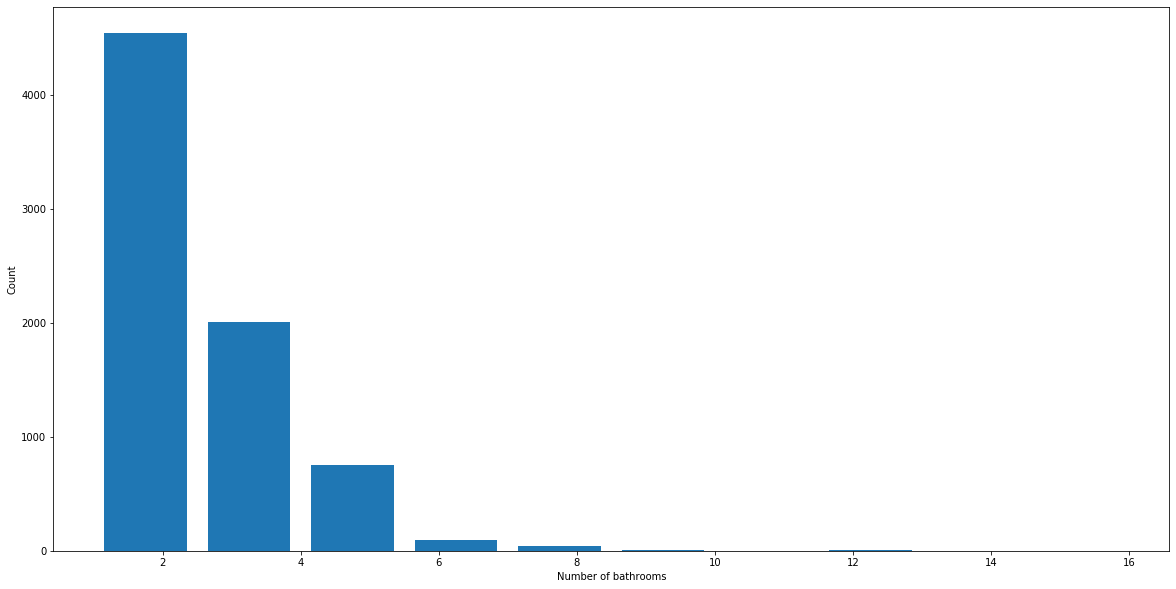

In [55]:
# HISTOGRAM OF NUMBER OF BATHROOMS AND COUNT

plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [56]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [57]:
# REMOVED THE OUTLIER APARTMENTS WITH TOO MANY BATHROOMS

df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7381, 7)

In [58]:
# DROPPING UNECCESSARY COLUMNS - PREPARATION FOR MACHINE LEARNING MODEL BUILDING

df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [60]:
# PANDAS DUMMIES WILL BE USED TO TURN 'LOCATION' INTO NUMERIC - FOR ML MODEL

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# APPEND DUMMIES TO DF10 AND ASSIGN TO NEW DF
# DROPPING ONE COLUMN ALLOWS DUMMY TRAP TO BE AVOIDED

df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# NOW 'LOCATION' COLUMN CAN BE DROPPED AS ML DOESN'T RECOGNISE STRINGS AND THE LOCATIONS HAVE BEEN ENUMERATED

df12 = df11.drop('location', axis='columns')
df12.head(2)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df12.shape

(7381, 245)

In [65]:
# DROP PRICE COLUMN 

X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# CHECKING PRICE COLUMN

y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [70]:
# ML TESTING TRAINING 
# 20% TEST SAMPLES

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
# LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
# TRAINS MODEL
lr_clf.fit(X_train,y_train)
# EVALUATES HOW GOOD MODEL IS
lr_clf.score(X_test,y_test)

0.8107805804377537

In [79]:
# IMPROVING SCORE

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# RANDOMISE SAMPLE - EACH DATA SAMPLE HAS EQUAL DISTRIBUTION
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 7.85739344e-01,  7.58741708e-01,  8.03028773e-01,  8.64736387e-01,
       -7.58357565e+14])

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
import xgboost
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model = XGBRegressor(n_estimators=150,learning_rate=0.07)
my_model.fit(X_train,y_train, early_stopping_rounds=5, 
             eval_set=[(X_test,y_test)], verbose=False)
my_model.score(X_test,y_test)

0.6762862307588596

In [92]:
# ALGORITHMS TO GET BEST SCORE

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# FUNCTION - TO FIND BEST MODEL USING GRIDSEARCHCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        }, 
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    # CROSS VALIDATION - SHUFFLE SAMPLE
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    # GOING THROUGH DICTINOARY AND INITIALISING GRIDSEARCH CV WITH MODELS
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        # APPENDS SCORES
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    # RETURN RESULTANT SCORES AS DF
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# CALLING METHOD ON OUR X, y
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.799088,{'normalize': True}
1,lasso,0.679364,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.666241,"{'criterion': 'mse', 'splitter': 'best'}"


In [93]:
# LINEAR REGRESSION WAS BEST

In [97]:
# FUNCTION TO PREDICT PRICE

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [98]:
# PREDICITNG PRICE FOR AN APARTMENT

predict_price('1st Phase JP Nagar',1000, 2, 2)

87.90749884722509

In [99]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

89.45307030005146

In [100]:
predict_price('Indira Nagar',1000, 2, 2)

176.43906297958915

In [102]:
# EXPORTING MODEL TO PICKLE FILE

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [103]:
# EXPORTING COLUMN INFORMATION

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns] 
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))